w [ 4.15615477 -3.79814071] b= -21.92943730754994
Index(['iter', 'w_0', 'w_1', 'b', 'loss'], dtype='object')


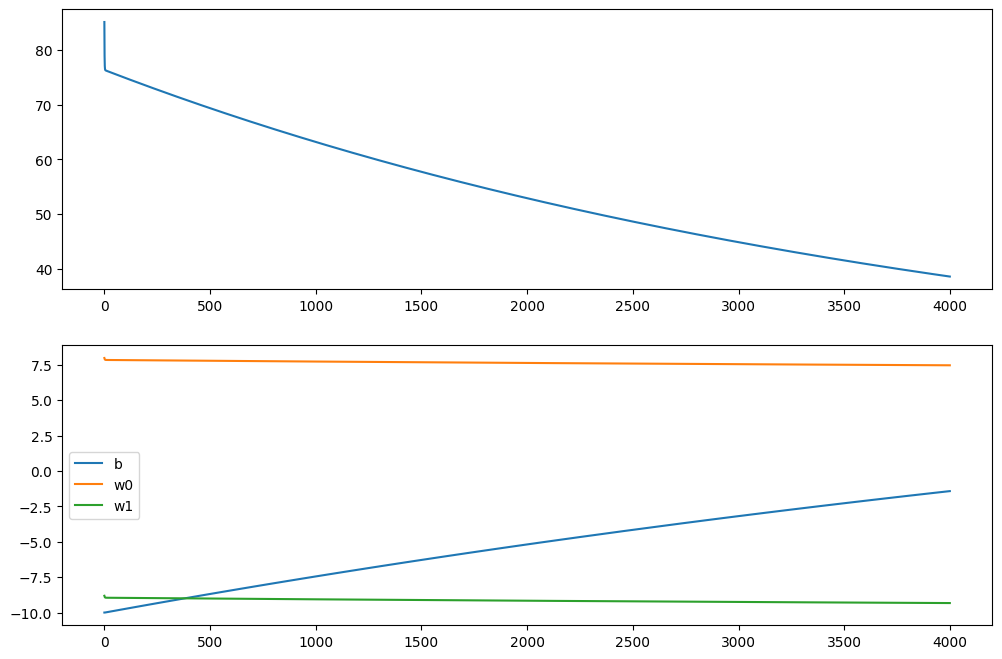

iter    3999.000000
w_0        7.468822
w_1       -9.331178
b         -1.422000
loss      38.624094
Name: 3999, dtype: float64


In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def line (w, b, x):
    return np.dot (x, w) + b


def get_data(ndata, ndim):
    np.random.seed (seed=292)
    X = np.zeros ([ndata, ndim])
    y = np.zeros ([ndata])
    x_min = np.random.randint (1,10,[ndim])
    x_max = np.random.randint (10,20,[ndim])
    for i in range (0, ndim):
       X[:,i] = np.linspace (x_min[i],x_max[i], ndata)
    w = np.random.normal (0.0,3.0,[ndim])
    b = np.random.normal (0.0,10.0,[1])[0]
    
    print("w",w,"b=",b)
    
    for i in range (0, ndata):
       y[i]  = line(w,b,X[i,:])
        
    y = y + np.random.normal (0.0,4.0,[ndata])
    return X, y


class LinearFit:
   # This is the main fitting module 
   def __init__(self,ndim, learning_rate,num_iter):
      # set the weight and intercept randomly 
      self.w = np.random.normal (0.0,15.0,[ndim])
      self.b = np.random.normal (0.0,15,[1])[0] 
      self.w = [8.1,-8.7]
      self.b = -10 
      self.ndim = ndim   
      self.lr = learning_rate  
      self.iter = num_iter


   def __grad__ (self, x,y):
      # This is the gradiant of the loss function MSE 
      n =  len (y) 
      e = y - line (self.w, self.b, x[:,])
      grad_w =  - np.sum (np.dot(x.T, e)) /n 
      grad_b =  - np.sum(e) / n
      return grad_w, grad_b

   def __loss__ (self, x, y):
      e = y - line (self.w, self.b, x[:,])
      return np.dot (e, e) / len (y)


   def fit(self, x, y):
      # This is the main fitting module
      
      cols = ["iter"] + ["w_"+str(i) for i in range (0, self.ndim)] + ["b"]+ ["loss"]  
      df = pd.DataFrame (columns=cols) 
      for i  in range(0, self.iter):
         grad_w, grad_b  = self.__grad__(x, y)
         self.w = self.w - self.lr * grad_w
         self.b = self.b - self.lr * grad_b
         loss =  self.__loss__(x, y)
         row = [i] + list (self.w) + ["%.3f" % self.b] + [loss] 
         df.loc[i] = row 
      return df 
       
   def predict (self, x):
       return  line (self.w, self.b, x)



if __name__ == "__main__":

    ndim = 2
    
    ndata = 10000
    learning_rate = 0.001
    num_iter = 4000
    X, y = get_data (ndata, ndim)

    M = LinearFit(ndim, learning_rate,num_iter) 
    df = M.fit(X,y)

    df = df.astype (float) 
    print(df.columns) 

    fig, axs = plt.subplots (2,1,figsize=(12,8))
    axs[0].plot(df['iter'], df['loss'])
    axs[1].plot(df['iter'], df['b'],label='b')
    
    axs[1].plot(df['iter'], df['w_0'],label='w0')
    axs[1].plot(df['iter'], df['w_1'],label='w1')
    #axs[1].plot(df['iter'], df['w_2'],label='w2')
    axs[1].legend()
    plt.show()

    
    print(df.iloc[-1])

